# Analysis and Winner Prediction in T20 Cricket

In [1]:
#importing pandas libraries for data analysis and manipulation.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
##loading the DataSet
df = pd.read_csv('cricket1.csv')

In [3]:
#peeking at dataset
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,5/4/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,6/4/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,7/4/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,8/4/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,8/4/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
df = df[['city','venue','team1','team2','toss_winner','toss_decision','winner']]

# Data Analysis

In [6]:
#Checking how many times a particular team won the matches
df['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [7]:
#Checking how many times a particular team won the toss
df['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [8]:
#checking missing values
df[df['winner'].isnull() == True]
#filling missing values
#df['winner'].fillna(0,inplace=True)
df = df.dropna(axis=0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745 entries, 0 to 755
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   city           745 non-null    object
 1   venue          745 non-null    object
 2   team1          745 non-null    object
 3   team2          745 non-null    object
 4   toss_winner    745 non-null    object
 5   toss_decision  745 non-null    object
 6   winner         745 non-null    object
dtypes: object(7)
memory usage: 46.6+ KB


In [10]:
#Checking Missing values
#df[df['city'].isnull() == True]
#Dropping the missing city rows
#df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745 entries, 0 to 755
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   city           745 non-null    object
 1   venue          745 non-null    object
 2   team1          745 non-null    object
 3   team2          745 non-null    object
 4   toss_winner    745 non-null    object
 5   toss_decision  745 non-null    object
 6   winner         745 non-null    object
dtypes: object(7)
memory usage: 46.6+ KB


In [11]:
df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [12]:
df.head()
df.shape

(745, 7)

In [13]:
#Keeping only consistent team
consistent_teams =['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
      'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Sunrisers Hyderabad', 'Delhi Capitals']
#df = df[(df['team1'].isin(consistent_teams)) & (df['team2'].isin(consistent_teams))]
df_teams_1 = df[df['team1'].isin(consistent_teams)]
df_teams_2 = df[df['team2'].isin(consistent_teams)]
df = pd.concat((df_teams_1, df_teams_2))
df.drop_duplicates(inplace=True)
df['team1'].unique()
df.shape

(598, 7)

In [14]:
#Encoding team name
team_encod = {
    'Kolkata Knight Riders': 1, 
    'Mumbai Indians': 2,
    'Chennai Super Kings': 3,             
    'Royal Challengers Bangalore': 4,     
    'Rajasthan Royals': 5,                
    'Kings XI Punjab':6,                 
    'Delhi Daredevils':7,                
    'Sunrisers Hyderabad':8,             
    'Deccan Chargers': 8,                                    
    'Delhi Capitals': 7,
    'Pune Warriors':9, 
    'Rising Pune Supergiant': 9,
    'Rising Pune Supergiants': 9,
    'Kochi Tuskers Kerala': 10,
    'Gujarat Lions': 11
}

In [15]:
team_encod_col ={
    'team1': team_encod,
    'team2': team_encod,
    'toss_winner': team_encod,
    'winner': team_encod
}
#replacing the name by encoded number
#df = df.replace(team_encod_col)   or  df.replace(team_encod_col, inplace=True)
df = df.replace(team_encod_col)

# Apply one hot encoding to category features

In [16]:
encoded_df = pd.get_dummies(data=df, columns=['team1','team2','toss_winner','city','toss_decision','venue'])

In [17]:
encoded_df.head()

,winner,team1_1,team1_2,team1_3,team1_4,team1_5,team1_6,team1_7,team1_8,team1_9,...,venue_Saurashtra Cricket Association Stadium,venue_Sawai Mansingh Stadium,venue_Shaheed Veer Narayan Singh International Stadium,venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,venue_St Georges Park,venue_Subrata Roy Sahara Stadium,venue_SuperSport Park,"venue_Vidarbha Cricket Association Stadium, Jamtha",venue_Wankhede Stadium
0,8,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,6,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
encoded_df.shape

(598, 108)

In [19]:
encoded_df.columns

Index(['winner', 'team1_1', 'team1_2', 'team1_3', 'team1_4', 'team1_5',
       'team1_6', 'team1_7', 'team1_8', 'team1_9',
       ...
       'venue_Saurashtra Cricket Association Stadium',
       'venue_Sawai Mansingh Stadium',
       'venue_Shaheed Veer Narayan Singh International Stadium',
       'venue_Sharjah Cricket Stadium', 'venue_Sheikh Zayed Stadium',
       'venue_St Georges Park', 'venue_Subrata Roy Sahara Stadium',
       'venue_SuperSport Park',
       'venue_Vidarbha Cricket Association Stadium, Jamtha',
       'venue_Wankhede Stadium'],
      dtype='object', length=108)

In [20]:
df

,city,venue,team1,team2,toss_winner,toss_decision,winner
0,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",8,4,4,field,8
1,Pune,Maharashtra Cricket Association Stadium,2,9,9,field,9
4,Bangalore,M Chinnaswamy Stadium,4,7,4,bat,4
6,Mumbai,Wankhede Stadium,1,2,2,field,2
7,Indore,Holkar Cricket Stadium,4,6,4,bat,6
...,...,...,...,...,...,...,...
606,Rajkot,Saurashtra Cricket Association Stadium,11,7,7,field,7
610,Bangalore,M Chinnaswamy Stadium,9,4,4,field,4
620,Kolkata,Eden Gardens,9,1,9,bat,1
632,Bangalore,M Chinnaswamy Stadium,11,4,4,field,4


In [21]:
df['venue'].value_counts()

M Chinnaswamy Stadium                                   51
Wankhede Stadium                                        50
Feroz Shah Kotla                                        49
Eden Gardens                                            47
Rajiv Gandhi International Stadium, Uppal               39
Sawai Mansingh Stadium                                  37
MA Chidambaram Stadium, Chepauk                         34
Punjab Cricket Association Stadium, Mohali              30
Maharashtra Cricket Association Stadium                 19
Subrata Roy Sahara Stadium                              16
Dr DY Patil Sports Academy                              16
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    13
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

In [22]:
df['winner'].dtype

dtype('int64')

<AxesSubplot:>

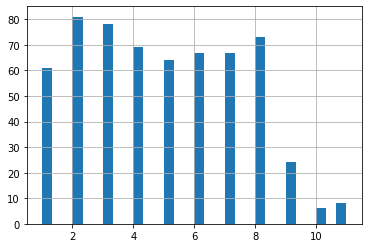

In [23]:
df['winner'].hist(bins=30)

In [24]:
#Encoding city, venue, toss_decision with label encoding
#from sklearn.preprocessing import LabelEncoder

#ftr_list = ['city','toss_decision','venue']
#encoder = LabelEncoder()
#for ftr in ftr_list:
    #encoded_df[ftr] = encoder.fit_transform(encoded_df[ftr])
    #print(encoder.classes_)

In [25]:
#encoded_df = pd.get_dummies(data=encoded_df, columns=['city','toss_decision','venue'])

In [26]:
encoded_df.columns
print(encoded_df.columns.tolist())

['winner', 'team1_1', 'team1_2', 'team1_3', 'team1_4', 'team1_5', 'team1_6', 'team1_7', 'team1_8', 'team1_9', 'team1_10', 'team1_11', 'team2_1', 'team2_2', 'team2_3', 'team2_4', 'team2_5', 'team2_6', 'team2_7', 'team2_8', 'team2_9', 'team2_10', 'team2_11', 'toss_winner_1', 'toss_winner_2', 'toss_winner_3', 'toss_winner_4', 'toss_winner_5', 'toss_winner_6', 'toss_winner_7', 'toss_winner_8', 'toss_winner_9', 'toss_winner_10', 'toss_winner_11', 'city_Abu Dhabi', 'city_Ahmedabad', 'city_Bangalore', 'city_Bengaluru', 'city_Bloemfontein', 'city_Cape Town', 'city_Centurion', 'city_Chandigarh', 'city_Chennai', 'city_Cuttack', 'city_Delhi', 'city_Dharamsala', 'city_Durban', 'city_East London', 'city_Hyderabad', 'city_Indore', 'city_Jaipur', 'city_Johannesburg', 'city_Kanpur', 'city_Kimberley', 'city_Kochi', 'city_Kolkata', 'city_Mohali', 'city_Mumbai', 'city_Nagpur', 'city_Port Elizabeth', 'city_Pune', 'city_Raipur', 'city_Rajkot', 'city_Ranchi', 'city_Sharjah', 'city_Visakhapatnam', 'toss_deci

In [27]:
df

,city,venue,team1,team2,toss_winner,toss_decision,winner
0,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",8,4,4,field,8
1,Pune,Maharashtra Cricket Association Stadium,2,9,9,field,9
4,Bangalore,M Chinnaswamy Stadium,4,7,4,bat,4
6,Mumbai,Wankhede Stadium,1,2,2,field,2
7,Indore,Holkar Cricket Stadium,4,6,4,bat,6
...,...,...,...,...,...,...,...
606,Rajkot,Saurashtra Cricket Association Stadium,11,7,7,field,7
610,Bangalore,M Chinnaswamy Stadium,9,4,4,field,4
620,Kolkata,Eden Gardens,9,1,9,bat,1
632,Bangalore,M Chinnaswamy Stadium,11,4,4,field,4


In [28]:
encoded_df

,winner,team1_1,team1_2,team1_3,team1_4,team1_5,team1_6,team1_7,team1_8,team1_9,...,venue_Saurashtra Cricket Association Stadium,venue_Sawai Mansingh Stadium,venue_Shaheed Veer Narayan Singh International Stadium,venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,venue_St Georges Park,venue_Subrata Roy Sahara Stadium,venue_SuperSport Park,"venue_Vidarbha Cricket Association Stadium, Jamtha",venue_Wankhede Stadium
0,8,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,6,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,7,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
610,4,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
620,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
632,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Machine Learning Model

In [29]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(encoded_df, test_size=0.4, random_state=2)
print(train_df.shape)
print(test_df.shape)

(358, 108)
(240, 108)


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [31]:
#Random Forest Classifier
#target_var = ['winner']
target_var = ['winner']
#predictor_var = ['team1','team2','venue','toss_winner','city','toss_decision']
predictor_var = ['team1_1', 'team1_2', 'team1_3', 'team1_4', 'team1_5', 'team1_6','team1_7', 'team1_8',
                 'team1_9', 'team1_10', 'team1_11', 'team2_1', 'team2_2', 'team2_3', 'team2_4', 'team2_5',
                 'team2_6', 'team2_7', 'team2_8', 'team2_9', 'team2_10', 'team2_11', 'toss_winner_1',
                 'toss_winner_2', 'toss_winner_3', 'toss_winner_4', 'toss_winner_5', 'toss_winner_6',
                 'toss_winner_7', 'toss_winner_8', 'toss_winner_9', 'toss_winner_10', 'toss_winner_11',
                 'city_Abu Dhabi', 'city_Ahmedabad', 'city_Bangalore', 'city_Bengaluru', 'city_Bloemfontein',
                 'city_Cape Town', 'city_Centurion', 'city_Chandigarh', 'city_Chennai', 'city_Cuttack',
                 'city_Delhi', 'city_Dharamsala', 'city_Durban', 'city_East London', 'city_Hyderabad',
                 'city_Indore', 'city_Jaipur', 'city_Johannesburg', 'city_Kanpur', 'city_Kimberley',
                 'city_Kochi', 'city_Kolkata', 'city_Mohali', 'city_Mumbai', 'city_Nagpur', 'city_Port Elizabeth',
                 'city_Pune', 'city_Raipur', 'city_Rajkot', 'city_Ranchi', 'city_Sharjah', 'city_Visakhapatnam',
                 'toss_decision_bat', 'toss_decision_field', 'venue_ACA-VDCA Stadium', 'venue_Barabati Stadium',
                 'venue_Brabourne Stadium', 'venue_Buffalo Park', 'venue_De Beers Diamond Oval',
                 'venue_Dr DY Patil Sports Academy', 'venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
                 'venue_Eden Gardens', 'venue_Feroz Shah Kotla', 'venue_Feroz Shah Kotla Ground', 'venue_Green Park',
                 'venue_Himachal Pradesh Cricket Association Stadium', 'venue_Holkar Cricket Stadium',
                 'venue_IS Bindra Stadium', 'venue_JSCA International Stadium Complex', 'venue_Kingsmead',
                 'venue_M Chinnaswamy Stadium', 'venue_M. A. Chidambaram Stadium', 'venue_M. Chinnaswamy Stadium',
                 'venue_MA Chidambaram Stadium, Chepauk', 'venue_Maharashtra Cricket Association Stadium', 
                 'venue_Nehru Stadium', 'venue_New Wanderers Stadium', 'venue_Newlands', 'venue_OUTsurance Oval',
                 'venue_Punjab Cricket Association IS Bindra Stadium, Mohali', 
                 'venue_Punjab Cricket Association Stadium, Mohali', 'venue_Rajiv Gandhi International Stadium, Uppal',
                 'venue_Rajiv Gandhi Intl. Cricket Stadium', 'venue_Sardar Patel Stadium, Motera', 
                 'venue_Saurashtra Cricket Association Stadium', 'venue_Sawai Mansingh Stadium',
                 'venue_Shaheed Veer Narayan Singh International Stadium', 'venue_Sharjah Cricket Stadium', 
                 'venue_Sheikh Zayed Stadium', 'venue_St Georges Park', 'venue_Subrata Roy Sahara Stadium',
                 'venue_SuperSport Park', 'venue_Vidarbha Cricket Association Stadium, Jamtha', 'venue_Wankhede Stadium']
model = DecisionTreeClassifier(random_state=5)

model.fit(train_df[predictor_var],train_df[target_var].values.ravel())
predictions = model.predict(test_df[predictor_var])
accuracy = accuracy_score(predictions,test_df[target_var])
print(accuracy)

model = RandomForestClassifier(n_estimators=50)

model.fit(train_df[predictor_var],train_df[target_var].values.ravel())
predictions = model.predict(test_df[predictor_var])
accuracy = accuracy_score(predictions,test_df[target_var])
print(accuracy)

0.4708333333333333
0.45416666666666666


Text(69.0, 0.5, 'Truth')

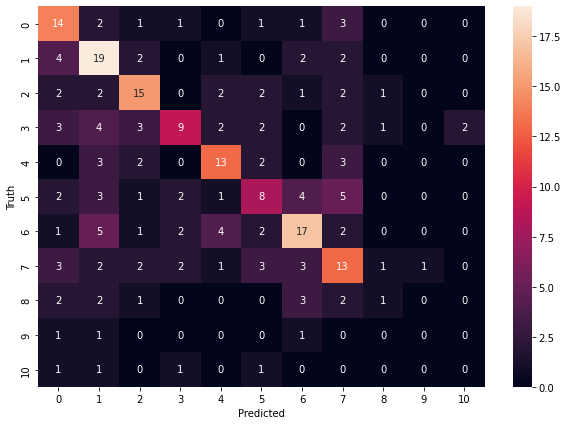

In [32]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(test_df[target_var],predictions)
cn
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
#Cross validation
from sklearn.model_selection import KFold
model = DecisionTreeClassifier(random_state=5)
kfold_validation = KFold(10)

from sklearn.model_selection import cross_val_score
results = cross_val_score(model,train_df[predictor_var],train_df[target_var],cv=kfold_validation)
print(results)
print(np.mean(results))

[0.22222222 0.44444444 0.47222222 0.47222222 0.38888889 0.55555556
 0.44444444 0.38888889 0.42857143 0.42857143]
0.4246031746031746


In [34]:
#Logistic Regression
model = LogisticRegression()

model.fit(train_df[predictor_var],train_df[target_var].values.ravel())
predictions = model.predict(test_df[predictor_var])
accuracy = accuracy_score(predictions,test_df[target_var])
print(accuracy)

0.48333333333333334


In [35]:
model = GaussianNB()

model.fit(train_df[predictor_var],train_df[target_var].values.ravel())
predictions = model.predict(test_df[predictor_var])
accuracy = accuracy_score(predictions,test_df[target_var])
print(accuracy)

0.20416666666666666


In [36]:
model = svm.SVC()

model.fit(train_df[predictor_var],train_df[target_var].values.ravel())
predictions = model.predict(test_df[predictor_var])
accuracy = accuracy_score(predictions,test_df[target_var])
print(accuracy)

0.4875


In [37]:
model = KNeighborsClassifier(n_neighbors=7)

model.fit(train_df[predictor_var],train_df[target_var].values.ravel())
predictions = model.predict(test_df[predictor_var])
accuracy = accuracy_score(predictions,test_df[target_var])
print(accuracy)

0.5


In [38]:
model = DecisionTreeClassifier(random_state=5)

model.fit(train_df[predictor_var],train_df[target_var].values.ravel())
predictions = model.predict(test_df[predictor_var])
accuracy = accuracy_score(predictions,test_df[target_var])
print(accuracy)

0.4708333333333333
